In [45]:
# Pre-setup in command line in vdi (nci) to run this code

## install sandard_precip for SPI calculation
## load python and datacube moduels

# 0. pip install --user ./standard_precip/ 
# 1. source /g/data/oe9/login_script.sh
# 2. module load agdc-py3-prod
# 3. jupyter notebook

import datacube
import xarray as xr
import pandas as pd
%matplotlib inline

In [46]:
from datacube.storage.masking import mask_invalid_data

In [47]:
#app is a note to let GA know what we are doing with it, user-defined
#when loading data, #make sure data is on same coordinate scale or convert 
dc=datacube.Datacube(app='learn-data-access')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://rg6346@130.56.244.105:6432/datacube)>>>

In [48]:
products = dc.list_products()
products.columns.tolist()

['name',
 'description',
 'gqa_iterative_mean_xy',
 'gqa_abs_iterative_mean_xy',
 'time',
 'sat_path',
 'instrument',
 'gqa',
 'gsi',
 'format',
 'gqa_ref_source',
 'gqa_abs_xy',
 'sat_row',
 'ancillary_quality',
 'orbit',
 'gqa_final_gcp_count',
 'gqa_cep90',
 'gqa_error_message',
 'gqa_stddev_xy',
 'lat',
 'gqa_iterative_stddev_xy',
 'lon',
 'gqa_mean_xy',
 'platform',
 'product_type',
 'crs',
 'resolution',
 'tile_size',
 'spatial_dimensions']

In [49]:
display_columns = ['name', 'description', 'platform', 'product_type', 'instrument', 'resolution']
display_columns

['name', 'description', 'platform', 'product_type', 'instrument', 'resolution']

In [50]:
# #list only nbar products
Rainfall_list = products[products['product_type'] == 'rainfall'][display_columns].dropna()
# productlist = products[display_columns].dropna()
Rainfall_list

,name,description,platform,product_type,instrument,resolution
id,,,,,,
36,bom_rainfall_grids,Interpolated Rain Gauge Precipitation 1-Day Au...,BoM,rainfall,rain gauge,"[-0.05, 0.05]"


In [51]:
measurements = dc.list_measurements()
measurements.columns.tolist()

['aliases',
 'dtype',
 'flags_definition',
 'name',
 'nodata',
 'spectral_definition',
 'units']

In [52]:
display_columns = ['units', 'nodata', 'aliases']
# display meausrements for one product
measurements[display_columns].loc['bom_rainfall_grids']

,units,nodata,aliases
measurement,,,
rainfall,mm,-999,NaN


In [53]:
query = {
    'time': ('2000-01-01', '2013-12-31'),
    'lat': (-24.585618, -37.682084), # Bounding Lat
    'lon': (138.568467, 152.488546), # Bongding Long
}
# attempt BoM rainfall 
#2 stars unpack the limits of our query, we load specific measurements from a product
Rainfall_data = dc.load(product='bom_rainfall_grids', measurements=['rainfall'], **query)

In [54]:

Rainfalldata = mask_invalid_data(Rainfall_data)
Rainfalldata

<xarray.Dataset>
Dimensions:    (latitude: 263, longitude: 279, time: 5113)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * latitude   (latitude) float64 -24.57 -24.62 -24.68 -24.72 -24.77 -24.82 ...
  * longitude  (longitude) float64 138.6 138.6 138.7 138.7 138.8 138.8 138.9 ...
Data variables:
    rainfall   (time, latitude, longitude) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      EPSG:4326

In [34]:
#Rainfalldata.squeeze(dim = None, drop = False)
#rain = Rainfalldata.drop(labels = 'Attributes', dim = None)
#Rainfalldata.to_netcdf('/g/data/oe9/project/team-drip/rainfall5km4mMDB.nc')
#from netCDF import Dataset


<xarray.Dataset>
Dimensions:    (latitude: 263, longitude: 279, time: 730)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * latitude   (latitude) float64 -24.57 -24.62 -24.68 -24.72 -24.77 -24.82 ...
  * longitude  (longitude) float64 138.6 138.6 138.7 138.7 138.8 138.8 138.9 ...
Data variables:
    rainfall   (time, latitude, longitude) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      EPSG:4326

In [55]:
Rainfalldata = mask_invalid_data(Rainfall_data)
Rainfalldata

<xarray.Dataset>
Dimensions:    (latitude: 263, longitude: 279, time: 5113)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * latitude   (latitude) float64 -24.57 -24.62 -24.68 -24.72 -24.77 -24.82 ...
  * longitude  (longitude) float64 138.6 138.6 138.7 138.7 138.8 138.8 138.9 ...
Data variables:
    rainfall   (time, latitude, longitude) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      EPSG:4326

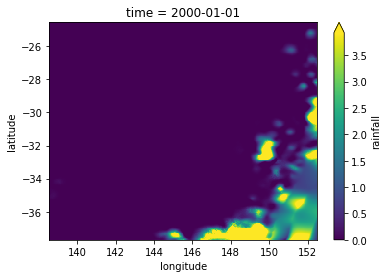

In [69]:
Rimg = Rainfalldata.isel(time=0).rainfall
Rimg.load()
Rimg.plot.imshow(robust=True)

In [12]:
# daily rainfall data
Rainfalldata.time

<xarray.DataArray 'time' (time: 5113)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', ..., '2013-12-28T00:00:00.000000000',
       '2013-12-29T00:00:00.000000000', '2013-12-30T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [70]:
# get monthly averaged rainfall
Rainmonth=Rainfalldata.resample(time="8D").sum() # monthly
Rainmonth

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<xarray.Dataset>
Dimensions:    (latitude: 263, longitude: 279, time: 640)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-09 2000-01-17 ...
  * latitude   (latitude) float64 -24.57 -24.62 -24.68 -24.72 -24.77 -24.82 ...
  * longitude  (longitude) float64 138.6 138.6 138.7 138.7 138.8 138.8 138.9 ...
Data variables:
    rainfall   (time, latitude, longitude) float32 2.7887e-06 2.74994e-06 ...

In [71]:
# install standard_precip module and save under /home/599/rg6346 or your own dir
import sys
sys.path.append('/home/599/rg6346/standard_precip/')
import standard_precip
from standard_precip.plot_index import plot_index
from standard_precip.spi import SPI 

from __future__ import absolute_import, division, print_function, unicode_literals
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np

def create_datelist(start_date, n_months):
    
    dates = [start_date + relativedelta(months=i) 
              for i in range(0, n_months)]
    
    return np.array(dates)

In [89]:
rainfall_x = Rainmonth.rainfall.data
rainfall_data = np.squeeze(rainfall_x) # to tidy up the rainfall data 
rainfall_data.shape

(640, 263, 279)

In [76]:
if __name__=='__main__':
    # Read precip data from csv
   # crnt_path = os.path.dirname(os.path.abspath('/home/599/rg6346/standard_precip/'))
    #precip_file = os.path.join(crnt_path,'standard_precip','data','rainfall_test.csv')
    #rainfall_data = np.genfromtxt(precip_file, delimiter=',')
    
    # Initialize SPI class
    spi = SPI() 
    
    # Set rolling window parameters
    spi.set_rolling_window_params(
        span=1, window_type=None, center=True
    )
    
    # Set distribution parameters
    spi.set_distribution_params(dist_type='gengamma')
    
    # Calculate SPI
    data = spi.calculate(rainfall_data, starting_month=1)
    


ValueError: shape mismatch: value array of shape (15066,) could not be broadcast to indexing result of shape (54,279)

In [74]:
    # Create date list for plotting
    n_dates = np.shape(data)[0]
    date_list = create_datelist(dt.date(2000,1,31), n_dates)
    
    # Plot SPI
    plot_index(date_list, data)
    print (np.squeeze(data))

NameError: name 'data' is not defined

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


distribution = gamma; SSE = 0.008787939357579483
distribution = gengamma; SSE = 0.00881718791873679
distribution = fisk; SSE = 0.00840974700939302
distribution = dweibull; SSE = 0.008912655455487355
distribution = logistic; SSE = 0.009906939098303855


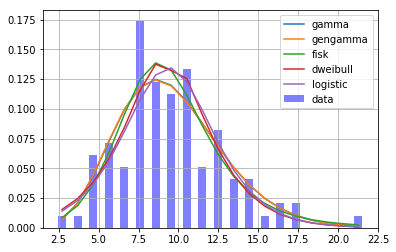

In [25]:
# Test find best distribution fit
import scipy.stats
dist_list = ['gamma', 'gengamma', 'fisk', 'dweibull', 'logistic']

test_data = scipy.stats.gamma.rvs(10., size=100)
sse = spi.best_fit_distribution(test_data, dist_list, bins=20, 
                                save_file='test.jpg')

for k in sse:
    print ("distribution = {0:}; SSE = {1:}".format(k, sse[k]))